<a href="https://colab.research.google.com/github/athmaja-n/AI-PROJECT/blob/master/flower1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x # we are using tensor flow version 1.14.0
import os #file operation
import shutil
import numpy as np # arrary operation
import pandas as pd# excel data import
import matplotlib.pyplot as plt #plot grap
import keras#for cnn 
from keras.preprocessing.image import ImageDataGenerator# for image preprocessing

##above all are libraries used in the code 

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
#MOunt drive compulsory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Image augmenttion
https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/



In [ ]:
#image is generation ,For image augmention
train_img_gen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 60,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
val_img_gen = ImageDataGenerator(
    rescale = 1/255.0,
)

# Read all the images from the drive folder

In [ ]:

train_gen = train_img_gen.flow_from_directory(
    '/content/drive/MyDrive/flower_102/train',
    batch_size = 8,
    

)
val_gen = val_img_gen.flow_from_directory(
    '/content/drive/MyDrive/flower_102/valid',
)

Found 6577 images belonging to 102 classes.
Found 818 images belonging to 102 classes.


In [ ]:

for (x, y) in train_gen:
  print(x.shape, y.shape)
  break

(8, 256, 256, 3) (8, 102)


# This the class name of 102 flowers

In [ ]:
cat_to_name={'1': 'pink primrose',
 '10': 'globe thistle',
 '100': 'blanket flower',
 '101': 'trumpet creeper',
 '102': 'blackberry lily',
 '11': 'snapdragon',
 '12': "colt's foot",
 '13': 'king protea',
 '14': 'spear thistle',
 '15': 'yellow iris',
 '16': 'globe-flower',
 '17': 'purple coneflower',
 '18': 'peruvian lily',
 '19': 'balloon flower',
 '2': 'hard-leaved pocket orchid',
 '20': 'giant white arum lily',
 '21': 'fire lily',
 '22': 'pincushion flower',
 '23': 'fritillary',
 '24': 'red ginger',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '27': 'prince of wales feathers',
 '28': 'stemless gentian',
 '29': 'artichoke',
 '3': 'canterbury bells',
 '30': 'sweet william',
 '31': 'carnation',
 '32': 'garden phlox',
 '33': 'love in the mist',
 '34': 'mexican aster',
 '35': 'alpine sea holly',
 '36': 'ruby-lipped cattleya',
 '37': 'cape flower',
 '38': 'great masterwort',
 '39': 'siam tulip',
 '4': 'sweet pea',
 '40': 'lenten rose',
 '41': 'barbeton daisy',
 '42': 'daffodil',
 '43': 'sword lily',
 '44': 'poinsettia',
 '45': 'bolero deep blue',
 '46': 'wallflower',
 '47': 'marigold',
 '48': 'buttercup',
 '49': 'oxeye daisy',
 '5': 'english marigold',
 '50': 'common dandelion',
 '51': 'petunia',
 '52': 'wild pansy',
 '53': 'primula',
 '54': 'sunflower',
 '55': 'pelargonium',
 '56': 'bishop of llandaff',
 '57': 'gaura',
 '58': 'geranium',
 '59': 'orange dahlia',
 '6': 'tiger lily',
 '60': 'pink-yellow dahlia',
 '61': 'cautleya spicata',
 '62': 'japanese anemone',
 '63': 'black-eyed susan',
 '64': 'silverbush',
 '65': 'californian poppy',
 '66': 'osteospermum',
 '67': 'spring crocus',
 '68': 'bearded iris',
 '69': 'windflower',
 '7': 'moon orchid',
 '70': 'tree poppy',
 '71': 'gazania',
 '72': 'azalea',
 '73': 'water lily',
 '74': 'rose',
 '75': 'thorn apple',
 '76': 'morning glory',
 '77': 'passion flower',
 '78': 'lotus lotus',
 '79': 'toad lily',
 '8': 'bird of paradise',
 '80': 'anthurium',
 '81': 'frangipani',
 '82': 'clematis',
 '83': 'hibiscus',
 '84': 'columbine',
 '85': 'desert-rose',
 '86': 'tree mallow',
 '87': 'magnolia',
 '88': 'cyclamen',
 '89': 'watercress',
 '9': 'monkshood',
 '90': 'canna lily',
 '91': 'hippeastrum',
 '92': 'bee balm',
 '93': 'ball moss',
 '94': 'foxglove',
 '95': 'bougainvillea',
 '96': 'camellia',
 '97': 'mallow',
 '98': 'mexican petunia',
 '99': 'bromelia'}

#open cv library using for Image processing

In [ ]:

import cv2
img=cv2.imread('/content/drive/MyDrive/flower_102/train/100/image_07893.jpg')#read the image from the folder
true_label = cat_to_name["100"]#read label of image
img_det = cv2.resize(img,(256,256))# resize the image to 256*256

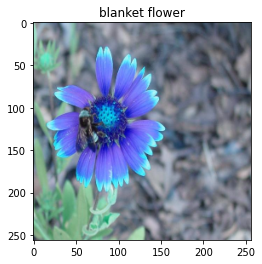

In [ ]:
import matplotlib.pyplot as plt#library used plot graph
plt.title(true_label)#title for image
plt.imshow(img_det)#display image

In [ ]:
from keras.models import * #import required model for cnn
from keras.layers import *# layer creation for cnn
from keras.optimizers import *#importing requied optimizer library

#https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

In [ ]:
adam = Adam(lr=0.00003)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
from keras.callbacks import Callback,  EarlyStopping
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.05, patience=3)

In [ ]:
# early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.05, patience=3)



# https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

In [ ]:
from keras_applications.resnext import ResNeXt50
resnext = ResNeXt50(weights='imagenet', input_shape = (256, 256, 3), classes=102, include_top=False, backend=keras.backend, layers=keras.layers, models=keras.models, utils=keras.utils)



92659712/92652672 [==============================] - 5s 0us/step


In [ ]:
res_avg = GlobalAveragePooling2D()(resnext.output)
res_fc_1 = Dense(256, activation='relu')(res_avg)
res_fc_2 = Dense(128, activation='relu')(res_fc_1)
res_d = Dropout(0.25)(res_fc_2)
res_fc_3 = Dense(102, activation='softmax')(res_d)

In [ ]:
resnext = Model(resnext.input, outputs  = res_fc_3)

In [ ]:
resnext.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9408        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
resnext.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
cp_resnext = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/model/model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period = 1)

In [ ]:

resnext_hist = resnext.fit_generator(train_gen, steps_per_epoch=6552//8, validation_data=val_gen, validation_steps=818//8, epochs=10, callbacks=[es, cp_resnext])


Epoch 1/10
819/819 [==============================] - 3589s 4s/step - loss: 3.0560 - accuracy: 0.3719 - val_loss: 0.7137 - val_accuracy: 0.8206

Epoch 00001: val_loss improved from inf to 0.71368, saving model to /content/drive/MyDrive/model/model-001-0.371887-0.820608.h5
Epoch 2/10
581/819 [====================>.........] - ETA: 4:46 - loss: 1.1637 - accuracy: 0.7587

In [ ]:
resnext.save('/content/drive/MyDrive/model/flowerdetection1.h5')
print("model saved")

In [ ]:
from keras.models import load_model
model_path = '/content/drive/MyDrive/model/flowerdetection1.h5'
model =load_model(model_path, compile=True)
print('model loaded')



model loaded


In [ ]:
import json
with open('/content/drive/My Drive/flowers/cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [ ]:
test_img_gen = ImageDataGenerator(
    rescale = 1/255.0,
)
test_gen = test_img_gen.flow_from_directory(
    '/content/drive/My Drive/flowers/test',
     batch_size = 1, shuffle=False,
)
for (x, y) in test_gen:
  print(x.shape, y.shape)
  break

Found 819 images belonging to 102 classes.
(1, 256, 256, 3) (1, 102)


In [ ]:
test_gen[0][1]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
test_gen[2][1]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
a=model.predict(test_gen[800][0])
pred = np.argmax(a)
print(pred)
cat_to_name['102']

98


'blackberry lily'

In [ ]:
model.evaluate(test_gen, steps=102,verbose=1)


102/102 [==============================] - 88s 861ms/step


[0.000259365770034492, 0.9803921580314636]

In [ ]:

import cv2
img=cv2.imread('/content/drive/My Drive/flowers/test/99/image_07833.jpg')
img_det = cv2.resize(img,(256,256))
img_det= img_det.astype("float") / 255.0
img_det= np.expand_dims(img_det, axis=0)
a=model.predict(img_det)[0]*100
top_classes = sorted(range(len(a)), key=lambda i: a[i])[-5:]
top_p= [a[i] for i in np.argsort(a)[-5:]]
print(top_classes)
print(top_p)
pred = np.argmax(a)
print(pred)


[85, 83, 86, 68, 101]
[0.00055730896, 0.00056446315, 0.0006260665, 0.00071318843, 99.992165]
101


In [ ]:
cat_to_name={'1': 'pink primrose',
 '10': 'globe thistle',
 '100': 'blanket flower',
 '101': 'trumpet creeper',
 '102': 'blackberry lily',
 '11': 'snapdragon',
 '12': "colt's foot",
 '13': 'king protea',
 '14': 'spear thistle',
 '15': 'yellow iris',
 '16': 'globe-flower',
 '17': 'purple coneflower',
 '18': 'peruvian lily',
 '19': 'balloon flower',
 '2': 'hard-leaved pocket orchid',
 '20': 'giant white arum lily',
 '21': 'fire lily',
 '22': 'pincushion flower',
 '23': 'fritillary',
 '24': 'red ginger',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '27': 'prince of wales feathers',
 '28': 'stemless gentian',
 '29': 'artichoke',
 '3': 'canterbury bells',
 '30': 'sweet william',
 '31': 'carnation',
 '32': 'garden phlox',
 '33': 'love in the mist',
 '34': 'mexican aster',
 '35': 'alpine sea holly',
 '36': 'ruby-lipped cattleya',
 '37': 'cape flower',
 '38': 'great masterwort',
 '39': 'siam tulip',
 '4': 'sweet pea',
 '40': 'lenten rose',
 '41': 'barbeton daisy',
 '42': 'daffodil',
 '43': 'sword lily',
 '44': 'poinsettia',
 '45': 'bolero deep blue',
 '46': 'wallflower',
 '47': 'marigold',
 '48': 'buttercup',
 '49': 'oxeye daisy',
 '5': 'english marigold',
 '50': 'common dandelion',
 '51': 'petunia',
 '52': 'wild pansy',
 '53': 'primula',
 '54': 'sunflower',
 '55': 'pelargonium',
 '56': 'bishop of llandaff',
 '57': 'gaura',
 '58': 'geranium',
 '59': 'orange dahlia',
 '6': 'tiger lily',
 '60': 'pink-yellow dahlia',
 '61': 'cautleya spicata',
 '62': 'japanese anemone',
 '63': 'black-eyed susan',
 '64': 'silverbush',
 '65': 'californian poppy',
 '66': 'osteospermum',
 '67': 'spring crocus',
 '68': 'bearded iris',
 '69': 'windflower',
 '7': 'moon orchid',
 '70': 'tree poppy',
 '71': 'gazania',
 '72': 'azalea',
 '73': 'water lily',
 '74': 'rose',
 '75': 'thorn apple',
 '76': 'morning glory',
 '77': 'passion flower',
 '78': 'lotus lotus',
 '79': 'toad lily',
 '8': 'bird of paradise',
 '80': 'anthurium',
 '81': 'frangipani',
 '82': 'clematis',
 '83': 'hibiscus',
 '84': 'columbine',
 '85': 'desert-rose',
 '86': 'tree mallow',
 '87': 'magnolia',
 '88': 'cyclamen',
 '89': 'watercress',
 '9': 'monkshood',
 '90': 'canna lily',
 '91': 'hippeastrum',
 '92': 'bee balm',
 '93': 'ball moss',
 '94': 'foxglove',
 '95': 'bougainvillea',
 '96': 'camellia',
 '97': 'mallow',
 '98': 'mexican petunia',
 '99': 'bromelia'}

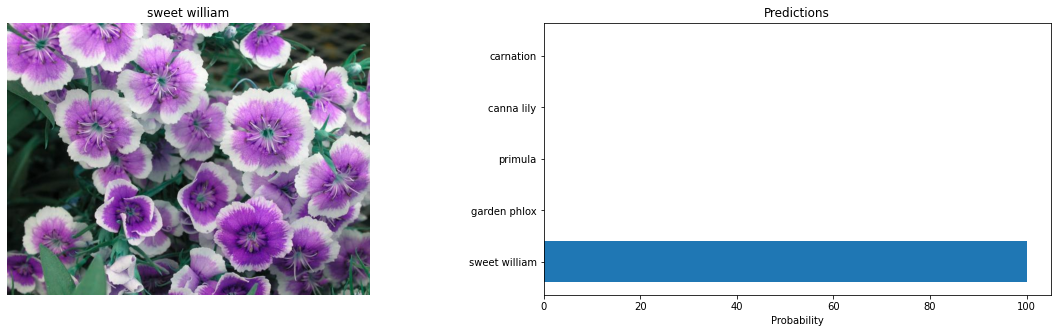

In [ ]:


img=cv2.imread('/content/drive/My Drive/flowers/test/30/image_03484.jpg')
true_label = cat_to_name["30"]
img_det = cv2.resize(img,(256,256))
img_det= img_det.astype("float") / 255.0
img_det= np.expand_dims(img_det, axis=0)
a=model.predict(img_det)[0]*100
top_classes = sorted(range(len(a)), key=lambda i: a[i])[-5:]
top_p= [a[i] for i in np.argsort(a)[-5:]]
labels = []
for classes in top_classes:
    labels.append(list(cat_to_name.values())[classes])

# Plotting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

# Test Image
ax1.set_title(true_label)
ax1.imshow(img)
ax1.axis('off')

# Top 5 predictions
ax2.set_title('Predictions')
ax2.set_yticks(np.arange(5))
ax2.set_yticklabels(labels)
ax2.set_xlabel('Probability')
ax2.invert_yaxis()
ax2.barh(np.arange(5), top_p, xerr=0, align='center')

plt.show()